## Import des modules

In [89]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Connexion à la base de données

In [9]:
client = MongoClient("localhost", 27017)
dbase  = client["presse-sentiment"]
collec = dbase["corpus"]

## Chargement des données

In [19]:
requete = collec.find()

df = pd.DataFrame(list(requete))

df.sort_values(by=["date"], axis=0, inplace=True)
df = df.reset_index(drop=True)

print("Shape :", df.shape)
df.tail(2)

Shape : (7541, 12)


,_id,titre,auteur,date,heure,extrait,lien,texte,matrice,positivite,subjectivite,enregistre
7539,5ebe6a81238b6997bfee8803,"Plage, piscines, randonnées, camping... Ce qu'...",BFMTV.COM,2020-05-15,04:51:00,Edouard Philippe l'a affirmé: les Français pou...,https://news.google.com/articles/CBMigAFodHRwc...,--,"{'vacance': 2, 'pouvoir': 2, 'hexagone': 1, 'a...",0.125000,0.100000,2020-05-15-12-10-09
7540,5ebeac089dfae489b84dcc1d,Officiel : Hilton prolonge le plaisir à Montpe...,Daily Mercato,2020-05-15,12:53:34,"Comme chaque année à cette période, Vitorino H...",https://news.google.com/articles/CBMiU2h0dHBzO...,--,"{'montpellier': 2, 'hilton': 2, 'vitorino': 1,...",0.163333,0.083333,2020-05-15-16-49-44


## Analyse par auteurs

In [68]:
a = df.pivot_table(values="titre", index="auteur", aggfunc="count")
b = df.pivot_table(values=["positivite", "subjectivite"], index="auteur", aggfunc="mean")

table_auteur = pd.concat([a,b], axis=1)
table_auteur = table_auteur.sort_values(by="titre", ascending=False)
print("Nombre dejournaux différents :", (len(df["auteur"].unique())))
print("==================================")
print("Top 20 :")
print(table_auteur.head(20))

Nombre dejournaux différents : 569
Top 20 :
                  titre  positivite  subjectivite
auteur                                           
20 Minutes          302    0.084609      0.219198
Le Figaro           249    0.086378      0.218541
Ouest-France        240    0.080502      0.198135
Sud Ouest           233    0.086799      0.243504
Le Monde            224    0.086844      0.191232
Le Parisien         210    0.072412      0.219011
BFMTV.COM           156    0.076303      0.154672
Actu Orange         155    0.084001      0.223976
LCI                 150    0.098667      0.199686
Boursorama          149    0.065485      0.159589
franceinfo          129    0.076594      0.216437
Yahoo Actualités    128    0.104093      0.246497
RTL.fr              123    0.092568      0.344505
L'Équipe.fr         122    0.080478      0.167287
Franceinfo          114    0.083948      0.211595
France Bleu         111    0.096141      0.163934
Le HuffPost         111    0.052910      0.268652
Foot M

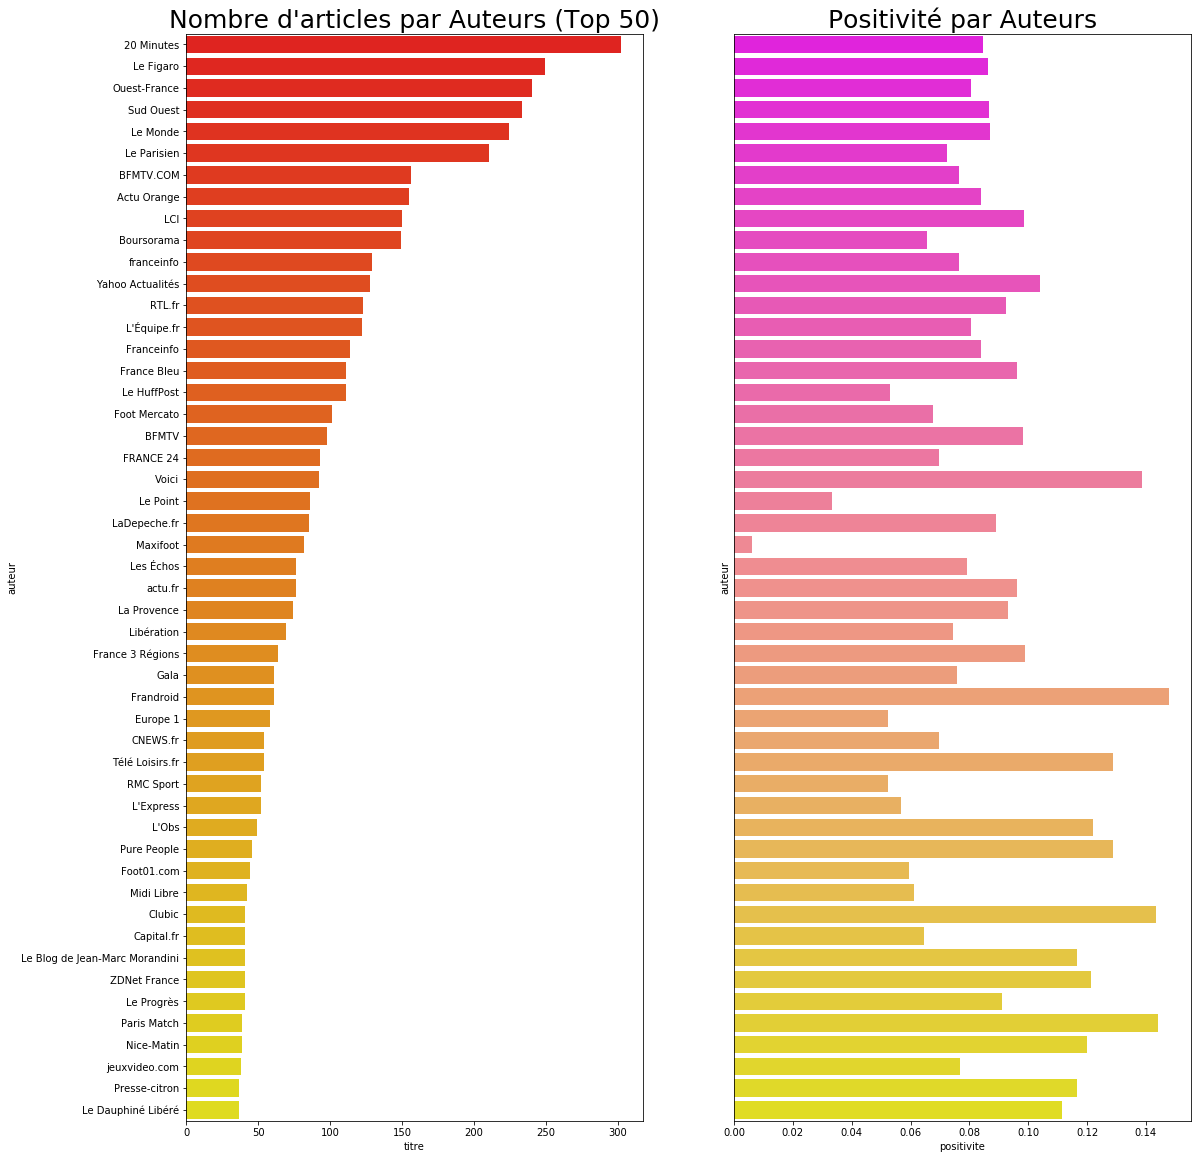

In [145]:
plt.figure(figsize=(18,20))

nb = 50
plt.subplot(1,2,1)
sns.barplot(table_auteur.head(nb).titre, table_auteur.head(nb).index, orient="h", palette="autumn")
plt.title(f"Nombre d'articles par Auteurs (Top {nb})", fontsize=25)

plt.subplot(1,2,2)
sns.barplot(table_auteur.head(nb).positivite, table_auteur.head(nb).index, orient="h", palette="spring")
plt.title(f"Positivité par Auteurs", fontsize=25)
plt.yticks([]) # Supprime l'affichage de Y

plt.show()

## Analyse par jours

## Analyse par positivité

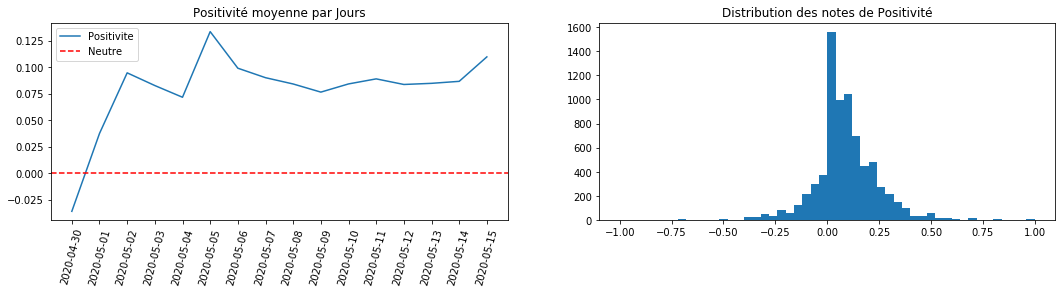

In [58]:
plt.figure(figsize=(18,8))

plt.subplot(2,2,1)

a = df[df["date"] != "--"]
table = a.pivot_table(index=["date"], values="positivite")

plt.plot(table.index, table.positivite, label="Positivite")
plt.axhline(y=0, linestyle="--", c="red", label="Neutre")
plt.xticks(rotation=75)
plt.title("Positivité moyenne par Jours")
plt.legend()


plt.subplot(2,2,2)
plt.hist(df.positivite, bins=50)
plt.title("Distribution des notes de Positivité")

plt.show()

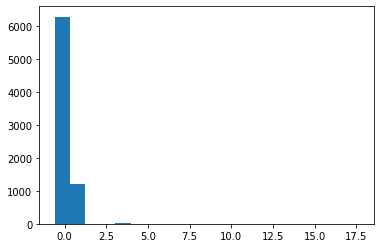

In [37]:
plt.hist(df.subjectivite, bins=20);